#### Zadanie 1 (4pkt):

Zadanie polega na wizualizacji algorytmu gradientu prostego. Rozważamy dwa typy powierzchni w $\mathbb{R}^3$: z jednym ekstremum oraz z jedym punktem siodłowym - przykady pokazuje  <a href=https://fraktal.faculty.wmi.amu.edu.pl/symulowanie_wizualne/lab4_r1.png>rysunek 1</a>. Dla każdej z nich należy wykonać dwa typy wizualizacji, pokazujących ciąg zbieżny do punktu ekstremalnego: 2D oraz 3D - przykład pokazuje  
 pokazuje to <a href=https://fraktal.faculty.wmi.amu.edu.pl/symulowanie_wizualne/lab4_r2.png>rysunek 2</a>. 
Wizualizacje powinny pokazywać działanie algorytmu z różnymi współczynnikami szybkości zbiegania, w tym przypadek kiedy zbieżność nie zostaje osiągnięta.
Gradient należy zakodować analitycznie.


#### Zadanie 2 (2pkt):

Zadanie jest identyczne jak Zadanie 1, z jednym wyjątkiem: gradient należy zakodować stosując aproksymację przez różnice skończone.


### Zadanie 1 ###

In [307]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
    
def f(x, y):
    return x ** 2 + y ** 2

def f2(x, y):
    return x ** 2 - y ** 2

x = np.linspace(-4, 4, 100)
y = np.linspace(-4, 4, 100)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)
Z2 = f2(X, Y)

In [308]:
#pochodna jest identyczna względem wartości x oraz y 
def df(x):
    return 2*x

def gradient(xi, yi, steps, lr):
    xline = []
    yline = []
    zline = []
   
    for i in range(0, steps):
        xi = xi - lr * df(xi)
        xline.append(xi)
        
        yi = yi - lr * df(yi)
        yline.append(yi)
        
        res = f(xi, yi)
        zline.append(res)
    
    return xline, yline, zline

In [309]:
def dfx2(x):
    return 2*x

def dfy2(y):
    return -2*y

def gradient2(xi, yi, steps, lr):
    xline = []
    yline = []
    zline = []
    
    for i in range(0, steps):
        xi = xi - lr * dfx2(xi)
        xline.append(xi)
        
        yi = yi - lr * dfy2(yi)
        yline.append(yi)
        
        res = f(xi, yi)
        zline.append(res)
        
    return xline, yline, zline

### Learning rate = 0.1 ###

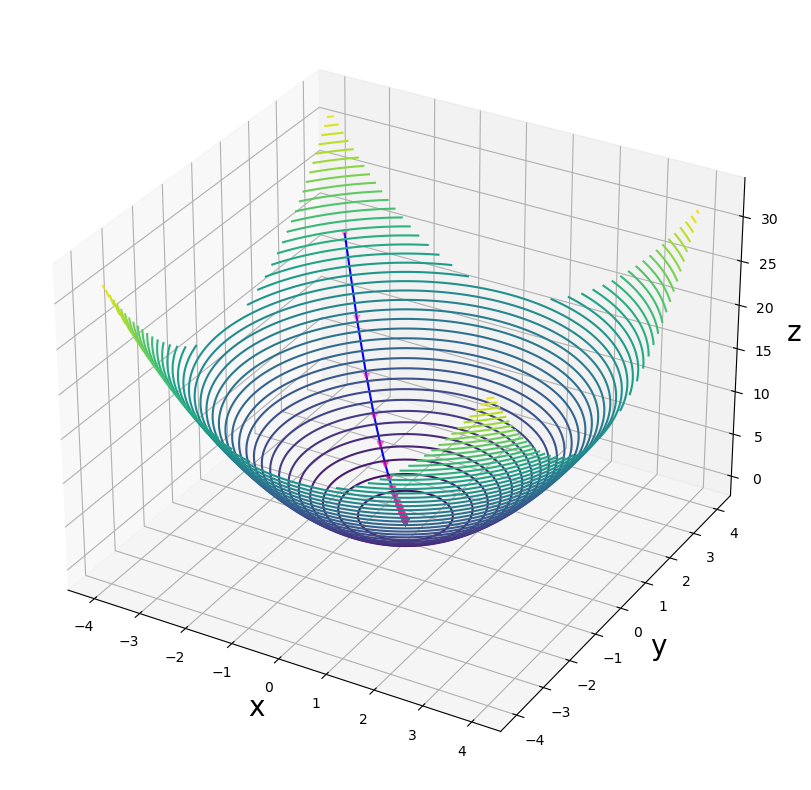

In [310]:
xline, yline, zline = gradient(-4, 4, 1500, 0.1)
fig = plt.figure(figsize=[10,10])
ax = plt.axes(projection='3d')
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_zlabel('z', fontsize=20)
ax.contour3D(X, Y, Z, 50, cmap='viridis')
ax.plot3D(xline, yline, zline, 'blue')
ax.scatter(xline, yline, zline, color='deeppink', marker='v')

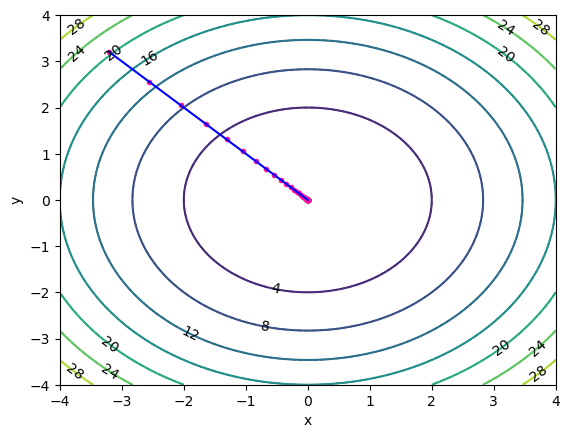

In [311]:
cp = plt.contour(X, Y, Z, colors='black', linestyles='dashed', linewidths=1)
plt.clabel(cp, inline=1, fontsize=10)
cp = plt.contour(X, Y, Z)
cp = plt.plot(xline, yline, color='blue')
cp = plt.scatter(xline, yline, color='deeppink', marker='.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


### Learning rate = 0.01 ###

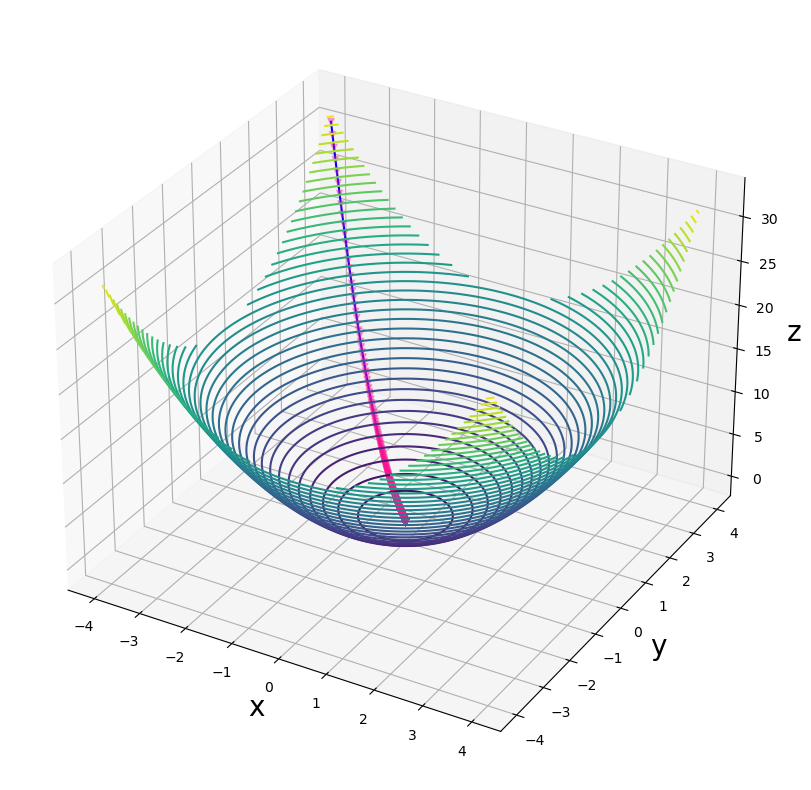

In [312]:
xline, yline, zline = gradient(-4, 4, 1500, 0.01)
fig = plt.figure(figsize=[10,10])
ax = plt.axes(projection='3d')
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_zlabel('z', fontsize=20)
ax.contour3D(X, Y, Z, 50, cmap='viridis')
ax.plot3D(xline, yline, zline, 'blue')
ax.scatter(xline, yline, zline, color='deeppink', marker='v')

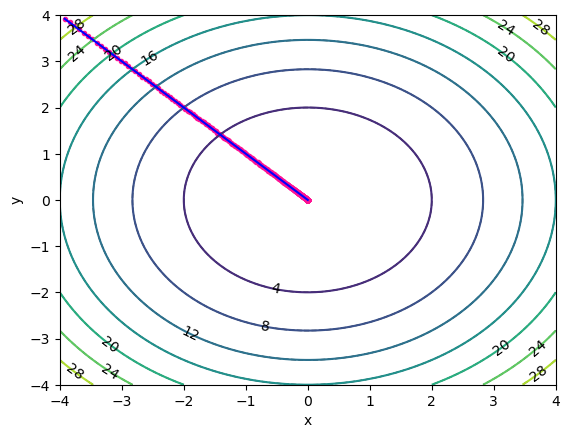

In [313]:
cp = plt.contour(X, Y, Z, colors='black', linestyles='dashed', linewidths=1)
plt.clabel(cp, inline=1, fontsize=10)
cp = plt.contour(X, Y, Z)
cp = plt.plot(xline, yline, color='blue')
cp = plt.scatter(xline, yline, color='deeppink', marker='.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Druga funkcja

### Learning rate = 0.1

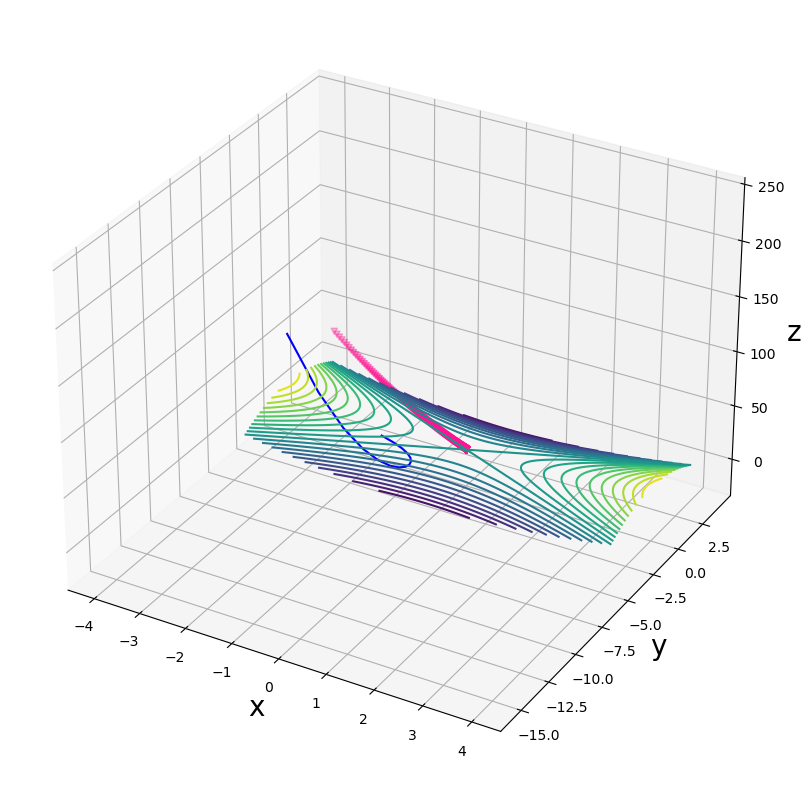

In [314]:
xline2, yline2, zline2 = gradient2(-2, -1, 15, 0.1)
fig = plt.figure(figsize=[10,10])
ax = plt.axes(projection='3d')
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_zlabel('z', fontsize=20)
ax.contour3D(X, Y, Z2, 30, cmap='viridis')
ax.plot3D(xline2, yline2, zline2, 'blue')
ax.scatter(xline, yline, zline, color='deeppink', marker='v')

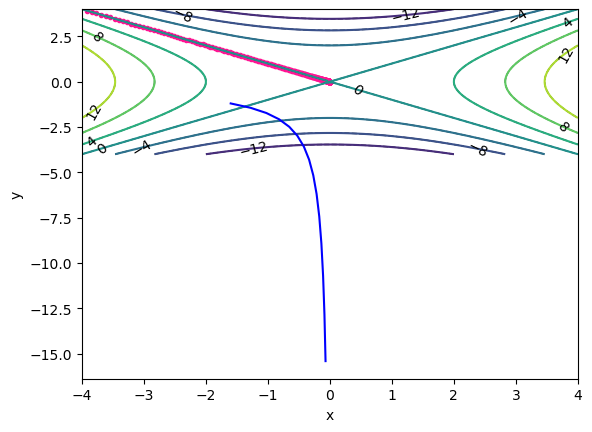

In [315]:
cp = plt.contour(X, Y, Z2, colors='black', linestyles='dashed', linewidths=1)
plt.clabel(cp, inline=1, fontsize=10)
cp = plt.contour(X, Y, Z2, cmap='viridis')
cp = plt.plot(xline2, yline2, color='blue')
cp = plt.scatter(xline, yline, color='deeppink', marker='.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Learning rate = 0.01

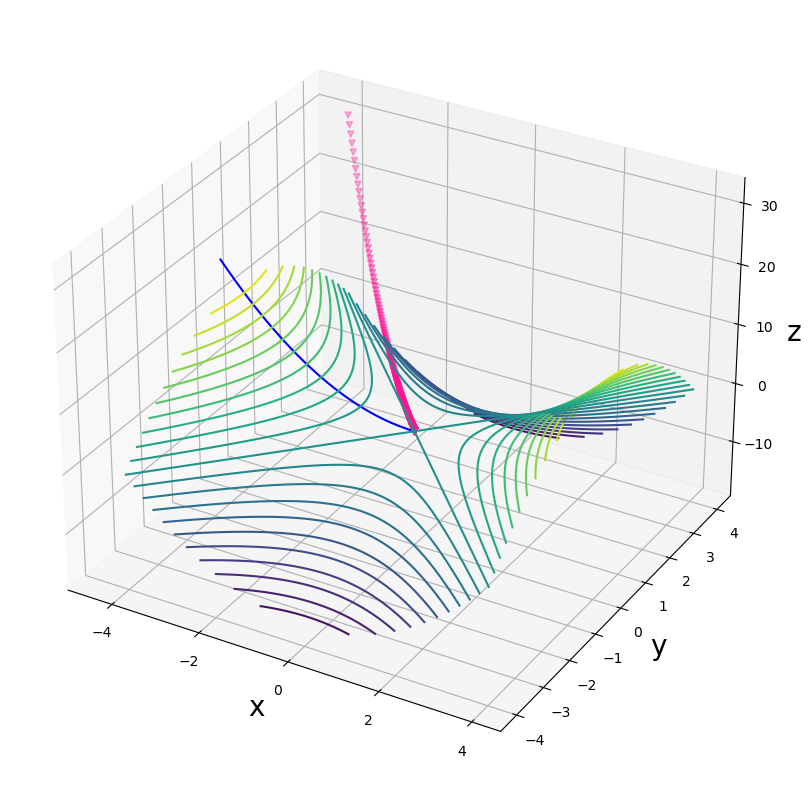

In [316]:
xline2, yline2, zline2 = gradient2(-4.5, 0, 1500, 0.01)
fig = plt.figure(figsize=[10,10])
ax = plt.axes(projection='3d')
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_zlabel('z', fontsize=20)
ax.contour3D(X, Y, Z2, 30, cmap='viridis')
ax.plot3D(xline2, yline2, zline2, 'blue')
ax.scatter(xline, yline, zline, color='deeppink', marker='v')

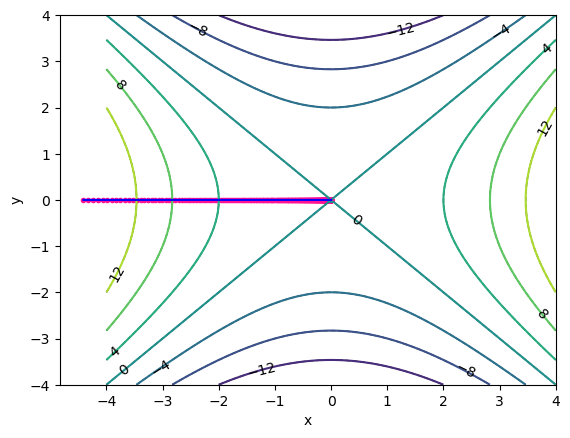

In [317]:
cp = plt.contour(X, Y, Z2, colors='black', linestyles='dashed', linewidths=1)
plt.clabel(cp, inline=1, fontsize=10)
cp = plt.contour(X, Y, Z2, cmap='viridis')
cp = plt.plot(xline2, yline2, color='blue')
cp = plt.scatter(xline2, yline2, color='deeppink', marker='.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Zmiana punktu startowego - brak zbieżności  ###

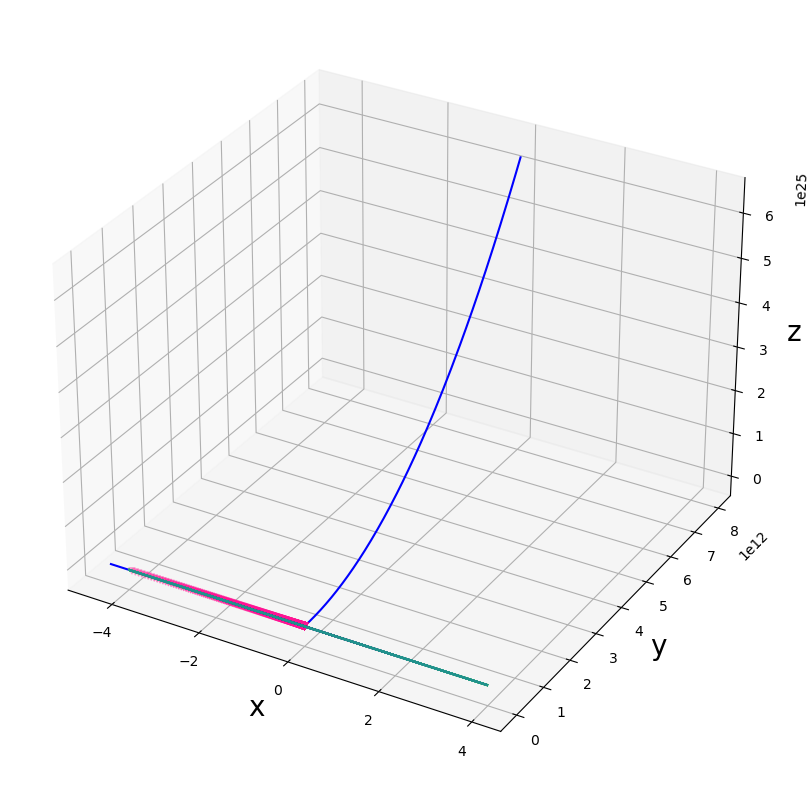

In [318]:
xline2, yline2, zline2 = gradient2(-4.5, 1, 1500, 0.01)
fig = plt.figure(figsize=[10,10])
ax = plt.axes(projection='3d')
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_zlabel('z', fontsize=20)
ax.contour3D(X, Y, Z2, 30, cmap='viridis')
ax.plot3D(xline2, yline2, zline2, 'blue')
ax.scatter(xline, yline, zline, color='deeppink', marker='v')

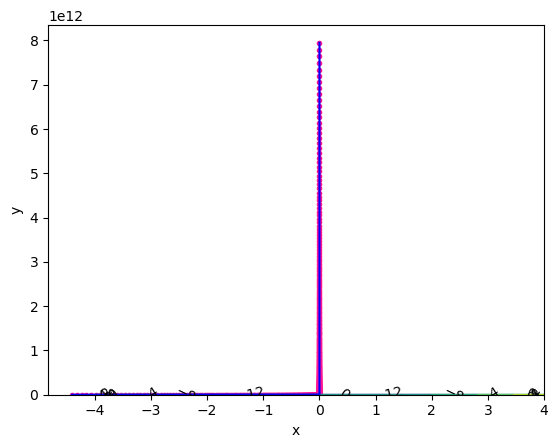

In [319]:
cp = plt.contour(X, Y, Z2, colors='black', linestyles='dashed', linewidths=1)
plt.clabel(cp, inline=1, fontsize=10)
cp = plt.contour(X, Y, Z2, cmap='viridis')
cp = plt.plot(xline2, yline2, color='blue')
cp = plt.scatter(xline2, yline2, color='deeppink', marker='.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Zadanie 2 ###

In [320]:

def dfx_differences(x, y, h):
    return (f(x + h, y) - f(x - h, y)) / 2*h

def dfy_differences(x, y, h):
    return (f(x, y + h) - f(x, y - h)) / 2*h

def gradient_differences(xi, yi, steps, lr, h):
    xline = []
    yline = []
    zline = []
   
    for i in range(0, steps):
        xi_new = xi - lr * dfx_differences(xi, yi, h)
        xline.append(xi)
        
        yi_new = yi - lr * dfy_differences(xi, yi, h)
        yline.append(yi)
        
        res = f(xi, yi)
        zline.append(res)
        
        xi = xi_new
        yi = yi_new
        
    return xline, yline, zline

def gradient_differences2(xi, yi, steps, lr, h):
    xline = []
    yline = []
    zline = []
   
    for i in range(0, steps):
        xi_new = xi - lr * dfx_differences(xi, yi, h)
        xline.append(xi)
        
        yi_new = yi - lr * dfy_differences(xi, yi, h)
        yline.append(yi)
        
        res = f2(xi, yi)
        zline.append(res)
        
        xi = xi_new
        yi = yi_new
        
    return xline, yline, zline

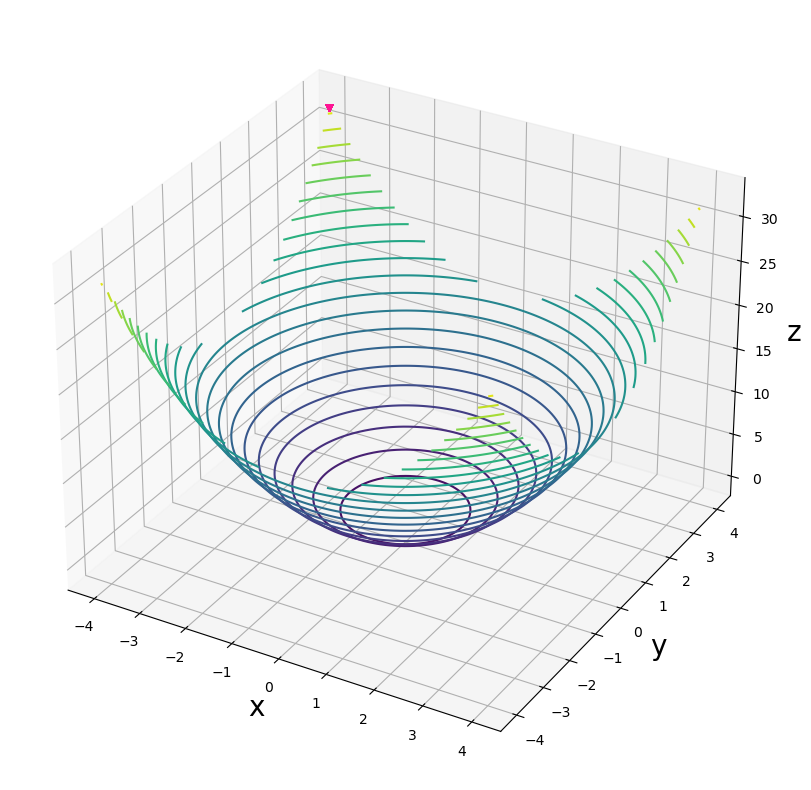

In [325]:
xline_diff, yline_diff, zline_diff = gradient_differences(-4, 4, 1000, 0.1, 0.001)
fig = plt.figure(figsize=[10,10])
ax = plt.axes(projection='3d')
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_zlabel('z', fontsize=20)
ax.contour3D(X, Y, Z, 30, cmap='viridis')
ax.plot3D(xline_diff, yline_diff, zline_diff, 'blue')
ax.scatter(xline_diff, yline_diff, zline_diff, color='deeppink', marker='v')

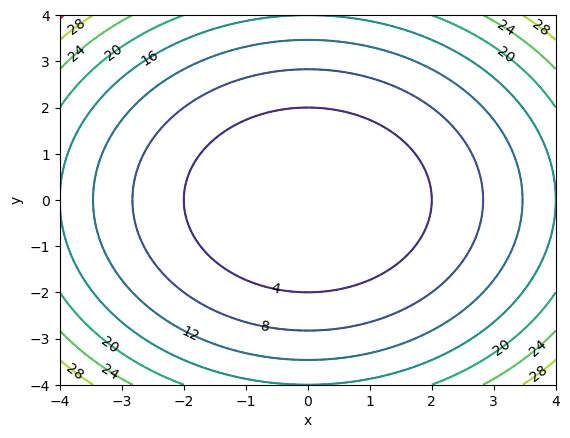

In [322]:
cp = plt.contour(X, Y, Z, colors='black', linestyles='dashed', linewidths=1)
plt.clabel(cp, inline=1, fontsize=10)
cp = plt.contour(X, Y, Z, cmap='viridis')
cp = plt.plot(xline_diff, yline_diff, color='blue')
cp = plt.scatter(xline_diff, yline_diff, color='deeppink', marker='.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

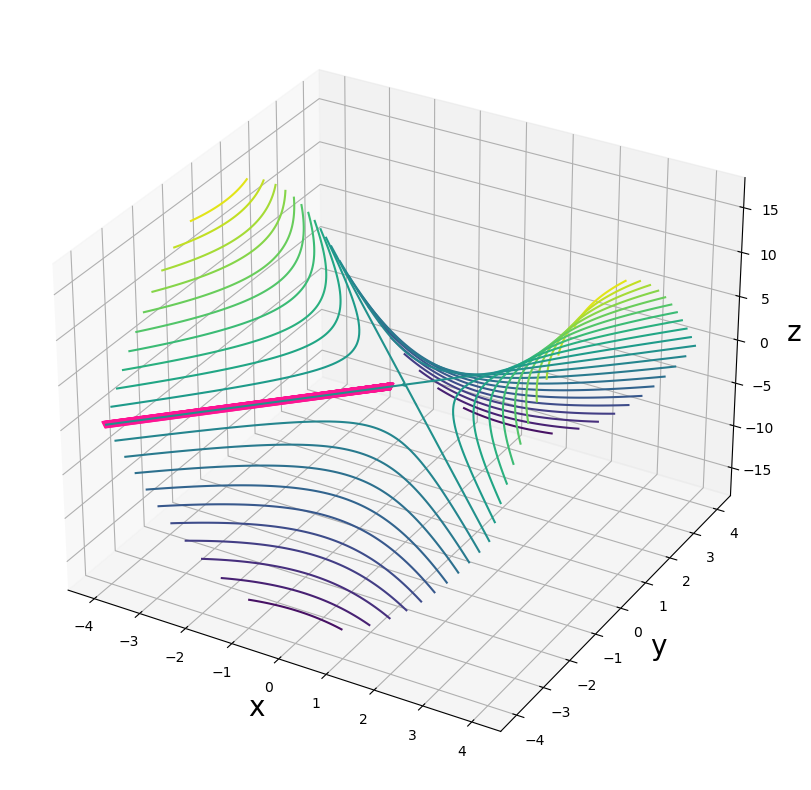

In [323]:
xline_diff2, yline_diff2, zline_diff2 = gradient_differences2(-4, -4, 1500, 0.1, 0.1)
fig = plt.figure(figsize=[10,10])
ax = plt.axes(projection='3d')
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_zlabel('z', fontsize=20)
ax.contour3D(X, Y, Z2, 30, cmap='viridis')
ax.plot3D(xline_diff2, yline_diff2, zline_diff2, 'blue')
ax.scatter(xline_diff2, yline_diff2, zline_diff2, color='deeppink', marker='v')

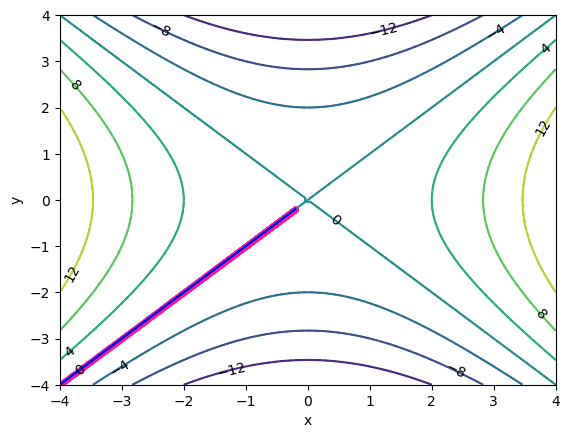

In [324]:
cp = plt.contour(X, Y, Z2, colors='black', linestyles='dashed', linewidths=1)
plt.clabel(cp, inline=1, fontsize=10)
cp = plt.contour(X, Y, Z2, cmap='viridis')
cp = plt.plot(xline_diff2, yline_diff2, color='blue')
cp = plt.scatter(xline_diff2, yline_diff2, color='deeppink', marker='.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()